In [116]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [117]:
import sys
sys.path.insert(0, '..//src/')

d:\Profile data Cardiff\Cardiff University\Energy Data - Documents\General\code\degree-days-analysis\notebooks
d:
Profile data Cardiff
Cardiff University
Energy Data - Documents
General
code
degree-days-analysis
notebooks
d:\


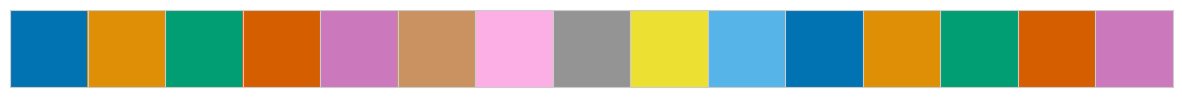

In [118]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import matplotlib.ticker as tkr
from matplotlib.colors import LinearSegmentedColormap
import matplotlib as mpl
import seaborn as sns
import sys
import random
import main
from common import enums, viz_functions
from pathlib import Path

random.seed(42)

# blues = [x for x in reversed(sns.color_palette("Blues_d", 11))]
# sns.set_palette(sns.color_palette("Paired", 10))
# sns.set_style("white")
sns.set_palette(sns.color_palette("colorblind", 15))
plt.rcParams['font.family'] = 'Times New Roman'
font_size = 12
params = {'axes.labelsize': font_size+2,
          'axes.titlesize':font_size+4,
          'legend.fontsize': font_size, 
          'xtick.labelsize': font_size,
          'ytick.labelsize': font_size,
          'font.size': font_size}
plt.rcParams.update(params)
sns.set_style("whitegrid")
export_fig_format = "pdf"
fig_format = "png"
dpi = 300
figsize = (12, 3.5)
figsize_map = (16, 8)
sns.palplot(sns.color_palette())

markers = ['P', 'o', '^', 's', '*', 'v']
linewidth = 0.1
edgecolor = 'black'

print(os.getcwd())
computer_path= ""
for x in os.getcwd().split(os.path.sep):
    print(x)
    computer_path=computer_path+x+os.path.sep
    if x == "sceac10":
        break    
    else: computer_path = os.getcwd().split(os.path.sep)[0]+os.path.sep
print(computer_path)


In [119]:
PATH_ONEDRIVE = Path(r'D:\Profile data Cardiff\OneDrive - Cardiff University')
path_gb_data = PATH_ONEDRIVE / r'04 - Projects\00 - Final data\Annual_demand'

In [120]:
scenario = 'after'
gb_df = pd.read_csv(path_gb_data /
                    f"GB_Annual_heat_demand_{scenario}_EE_LSOA.csv", index_col=0)
gb_df.head()

,Lsoa11cd,Msoa11cd,Road length (m),Area (km2),Average heat demand after energy efficiency measures for detached gas boiler (kWh),Average heat demand after energy efficiency measures for detached oil boiler (kWh),Average heat demand after energy efficiency measures for detached resistance heating (kWh),Average heat demand after energy efficiency measures for detached biomass boiler (kWh),Average heat demand after energy efficiency measures for flat gas boiler (kWh),Average heat demand after energy efficiency measures for flat oil boiler (kWh),...,Number of semi-detached gas boiler in 2011,Number of semi-detached oil boiler in 2011,Number of semi-detached resistance heating in 2011,Number of semi-detached biomass boiler in 2011,Number of terraced gas boiler in 2011,Number of terraced oil boiler in 2011,Number of terraced resistance heating in 2011,Number of terraced biomass boiler in 2011,Region,Local authority
0,S01006506,S02001236,7144.704905,4.388802,17533.867465,19188.338395,12421.661777,25067.327542,6345.682390,9060.830466,...,50.0,6.0,2.0,0.0,30.0,0.0,1.0,1.0,North East Scotland,aberdeen city
1,S01006507,S02001236,3562.459752,0.221747,17923.774795,13757.559918,10184.000000,25067.327542,7425.669120,9060.830466,...,51.0,0.0,8.0,0.0,114.0,0.0,23.0,0.0,North East Scotland,aberdeen city
2,S01006508,S02001236,2689.130582,0.270195,18591.328478,20481.357955,13352.226064,25067.327542,6777.056946,9060.830466,...,18.0,0.0,4.0,0.0,36.0,0.0,2.0,0.0,North East Scotland,aberdeen city
3,S01006509,S02001236,2029.960587,0.096254,17752.107015,20481.357955,12506.961340,25067.327542,6574.791345,9060.830466,...,64.0,0.0,9.0,1.0,68.0,0.0,5.0,1.0,North East Scotland,aberdeen city
4,S01006510,S02001236,2312.863906,0.180077,18234.389031,20481.357955,12421.661777,25067.327542,6431.907359,9060.830466,...,96.0,2.0,2.0,0.0,35.0,1.0,1.0,0.0,North East Scotland,aberdeen city


In [121]:
list_columns = [x for x in gb_df.columns if f"Average heat demand {scenario}" in x]
list_columns

['Average heat demand after energy efficiency measures for detached gas boiler (kWh)',
 'Average heat demand after energy efficiency measures for detached oil boiler (kWh)',
 'Average heat demand after energy efficiency measures for detached resistance heating (kWh)',
 'Average heat demand after energy efficiency measures for detached biomass boiler (kWh)',
 'Average heat demand after energy efficiency measures for flat gas boiler (kWh)',
 'Average heat demand after energy efficiency measures for flat oil boiler (kWh)',
 'Average heat demand after energy efficiency measures for flat resistance heating (kWh)',
 'Average heat demand after energy efficiency measures for flat biomass boiler (kWh)',
 'Average heat demand after energy efficiency measures for semi-detached gas boiler (kWh)',
 'Average heat demand after energy efficiency measures for semi-detached oil boiler (kWh)',
 'Average heat demand after energy efficiency measures for semi-detached resistance heating (kWh)',
 'Average he

In [122]:
## Remove outliers
for c in list_columns:
  max_value = gb_df[c].quantile(0.99)
  filt = gb_df[c] > max_value
  gb_df.loc[filt, c] = max_value

In [123]:
to_plot_df = pd.DataFrame()
to_plot_df.index = gb_df['Lsoa11cd'].values
to_plot_df[f"Total heat demand {scenario} energy efficiency measures (MWh)"] = gb_df[
    list_columns].sum(axis=1).values/1000
to_plot_df.head()

,Total heat demand after energy efficiency measures (MWh)
S01006506,203.112075
S01006507,193.344513
S01006508,203.242481
S01006509,199.727021
S01006510,200.513420


In [124]:
map_df = viz_functions.get_UK_LSOA_map()
map_df = pd.merge(map_df, to_plot_df, left_on='LSOA11CD', right_index=True)
map_df.head()

,FID,LSOA11CD,LSOA11NM,LSOA11NMW,BNG_E,BNG_N,LONG,LAT,GlobalID,DataZone,...,ResPop2011,HHCnt2011,StdAreaHa,StdAreaKm2,Shape_Leng,Shape_Area,layer,path,geometry,Total heat demand after energy efficiency measures (MWh)
0,1.0,E01000001,City of London 001A,City of London 001A,532123.0,181632.0,-0.097140,51.51816,a758442e-7679-45d0-95a8-ed4c968ecdaa,None,...,NaN,NaN,NaN,NaN,NaN,NaN,LSOA_2011_Boundaries_Super_Generalised_Clipped...,D:/Profile data Cardiff/OneDrive - Cardiff Uni...,"MULTIPOLYGON (((532282.629 181906.496, 532248....",147.730181
1,2.0,E01000002,City of London 001B,City of London 001B,532480.0,181715.0,-0.091970,51.51882,861dbb53-dfaf-4f57-be96-4527e2ec511f,None,...,NaN,NaN,NaN,NaN,NaN,NaN,LSOA_2011_Boundaries_Super_Generalised_Clipped...,D:/Profile data Cardiff/OneDrive - Cardiff Uni...,"MULTIPOLYGON (((532746.814 181786.892, 532248....",148.959636
2,3.0,E01000003,City of London 001C,City of London 001C,532239.0,182033.0,-0.095320,51.52174,9f765b55-2061-484a-862b-fa0325991616,None,...,NaN,NaN,NaN,NaN,NaN,NaN,LSOA_2011_Boundaries_Super_Generalised_Clipped...,D:/Profile data Cardiff/OneDrive - Cardiff Uni...,"MULTIPOLYGON (((532293.068 182068.422, 532419....",148.887257
3,4.0,E01000005,City of London 001E,City of London 001E,533581.0,181283.0,-0.076270,51.51468,a55c4c31-ef1c-42fc-bfa9-07c8f2025928,None,...,NaN,NaN,NaN,NaN,NaN,NaN,LSOA_2011_Boundaries_Super_Generalised_Clipped...,D:/Profile data Cardiff/OneDrive - Cardiff Uni...,"MULTIPOLYGON (((533604.245 181418.129, 533743....",148.037174
4,5.0,E01000006,Barking and Dagenham 016A,Barking and Dagenham 016A,544994.0,184274.0,0.089317,51.53875,9cdabaa8-d9bd-4a94-bb3b-98a933ceedad,None,...,NaN,NaN,NaN,NaN,NaN,NaN,LSOA_2011_Boundaries_Super_Generalised_Clipped...,D:/Profile data Cardiff/OneDrive - Cardiff Uni...,"MULTIPOLYGON (((545271.918 184183.948, 545296....",147.830794


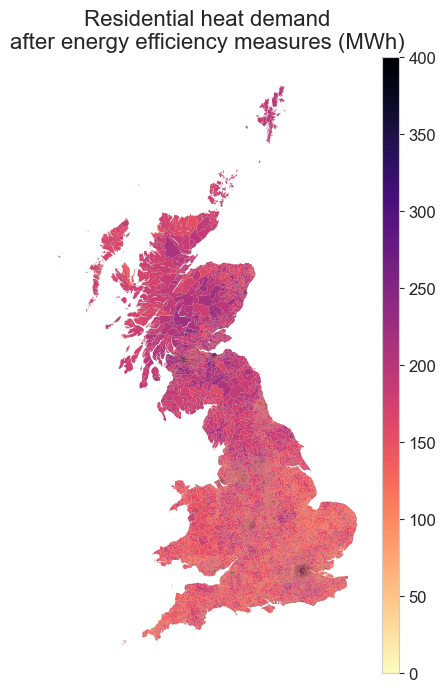

In [125]:
fig, ax = plt.subplots(figsize=(figsize_map))
cmap_1 = 'magma_r'
target = f"Total heat demand {scenario} energy efficiency measures (MWh)"
map_obj = viz_functions.plot_map(map_df,
                                 target,
                                 ax,
                                 vmin=0,
                                 vmax=400,
                                 cmap=cmap_1,
                                 legend=True)

ax.set_title(f"Residential heat demand\n{scenario} energy efficiency measures (MWh)")
fig